In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-user-pathways/airbnb.csv


In [2]:
df = pd.read_csv("/kaggle/input/airbnb-user-pathways/airbnb.csv")
df.drop("id_visitor", axis = 1, inplace = True)
df.drop("id_session", axis = 1, inplace = True)
df.drop("next_id_session", axis = 1, inplace = True)
df.drop("dim_user_agent", axis = 1, inplace = True)

df.head()

,dim_session_number,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,83,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0
1,84,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0
2,85,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,0,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0
3,86,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,0,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0
4,87,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,0,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0


In [3]:
df.describe()

,dim_session_number,did_search,sent_message,sent_booking_request,next_dim_session_number,next_did_search,next_sent_message,next_sent_booking_request
count,7756.000000,7756.000000,7756.000000,7756.000000,7126.000000,7126.000000,7126.000000,7126.000000
mean,98.091671,0.159360,0.164905,0.018695,106.675414,0.145804,0.175554,0.019366
std,131.533939,0.366036,0.371118,0.135455,133.879600,0.352934,0.380467,0.137816
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000
50%,46.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,0.000000
75%,128.000000,0.000000,0.000000,0.000000,140.750000,0.000000,0.000000,0.000000
max,702.000000,1.000000,1.000000,1.000000,702.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

dim_session_number             0
dim_device_app_combo           0
ds                             0
ts_min                         0
ts_max                         0
did_search                     0
sent_message                   0
sent_booking_request           0
next_dim_session_number      630
next_dim_user_agent          829
next_dim_device_app_combo    630
next_ds                      630
next_ts_min                  630
next_ts_max                  630
next_did_search              630
next_sent_message            630
next_sent_booking_request    630
dtype: int64

In [5]:
# 1. Which app is used the most? 
# 2. The realation between used app and booking, sending message
# 3. time spent on average?
# 4. time spent on average by used app
# 5.


In [6]:
df.corr()*100


,dim_session_number,did_search,sent_message,sent_booking_request,next_dim_session_number,next_did_search,next_sent_message,next_sent_booking_request
dim_session_number,100.000000,-21.945699,0.412818,-6.298237,100.000000,-21.306497,-1.779141,-7.003707
did_search,-21.945699,100.000000,4.478385,17.657254,-22.360934,38.808445,-0.919917,8.809757
sent_message,0.412818,4.478385,100.000000,21.313432,-2.045221,-7.564367,12.789903,1.721503
sent_booking_request,-6.298237,17.657254,21.313432,100.000000,-7.239914,1.696763,4.907407,6.666247
next_dim_session_number,100.000000,-22.360934,-2.045221,-7.239914,100.000000,-21.306497,-1.779141,-7.003707
next_did_search,-21.306497,38.808445,-7.564367,1.696763,-21.306497,100.000000,4.975106,18.720816
next_sent_message,-1.779141,-0.919917,12.789903,4.907407,-1.779141,4.975106,100.000000,20.282179
next_sent_booking_request,-7.003707,8.809757,1.721503,6.666247,-7.003707,18.720816,20.282179,100.000000


<AxesSubplot:>

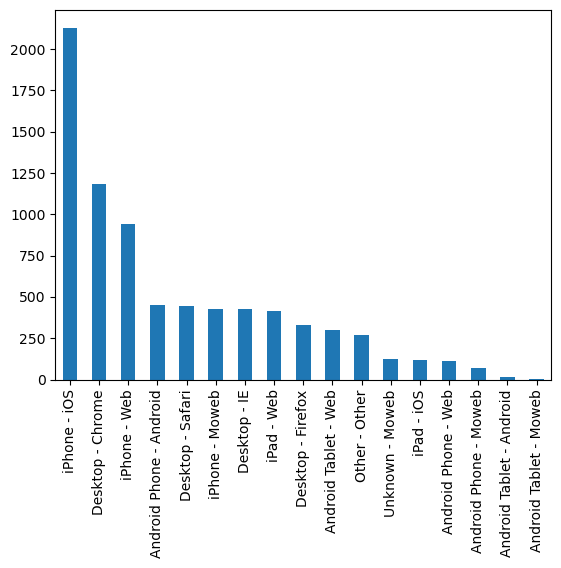

In [7]:
#1
device = df['dim_device_app_combo'].value_counts()

device.plot.bar(x='device', y='val', rot=90)

<AxesSubplot:ylabel='dim_device_app_combo'>

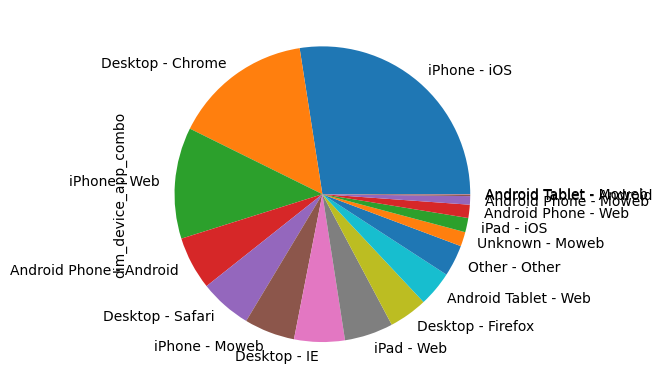

In [8]:
device.plot.pie()

,dim_session_number,did_search,sent_message,sent_booking_request,next_dim_session_number,next_did_search,next_sent_message,next_sent_booking_request
dim_device_app_combo,,,,,,,,
iPhone - iOS,298467,253,373,19,298711.0,258.0,270.0,32.0
Desktop - Chrome,58199,319,272,56,57681.0,217.0,206.0,40.0
Desktop - IE,33478,93,133,11,32691.0,62.0,111.0,7.0
Android Tablet - Web,44598,18,101,1,44465.0,11.0,97.0,1.0
Desktop - Safari,18682,170,98,19,18449.0,95.0,72.0,13.0
Android Phone - Android,21202,81,87,6,21163.0,77.0,85.0,9.0
Desktop - Firefox,9731,125,75,20,9742.0,86.0,59.0,16.0
iPad - Web,11329,99,44,5,11299.0,77.0,61.0,6.0
iPhone - Moweb,66606,5,27,2,66896.0,20.0,30.0,2.0


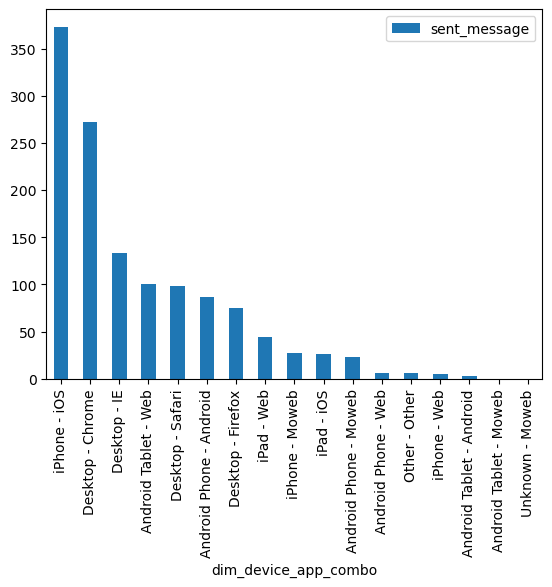

In [9]:
sending = df.groupby('dim_device_app_combo').sum()
sending.sort_values("sent_message",ascending= False, inplace= True)
sending.plot.bar(y='sent_message')
sending

In [10]:
df['ts_min']=pd.to_datetime(df['ts_min'])
df['ts_max']=pd.to_datetime(df['ts_max'])


<AxesSubplot:xlabel='dim_device_app_combo'>

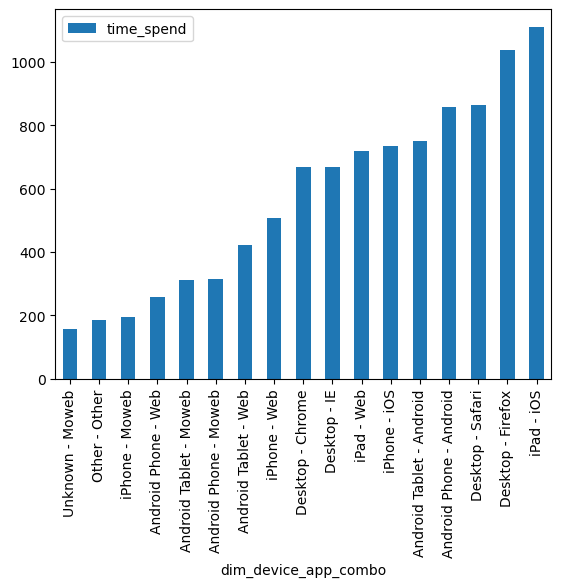

In [11]:

df['time_spend']=df['ts_max']-df['ts_min']
df['time_spend']=df['time_spend'] .dt.total_seconds()
time_spend= sending = df.groupby('dim_device_app_combo').mean().sort_values('time_spend')
time_spend.plot.bar(y='time_spend')

In [12]:
# The realtion between sending a message and sending a request
cout = df['sent_message'].sum()
sent_message = df.groupby(['sent_message','sent_booking_request']).count()
sent_message


dim_session_number  dim_device_app_combo  \
sent_message sent_booking_request                                             
0            0                                   6439                  6439   
             1                                     38                    38   
1            0                                   1172                  1172   
             1                                    107                   107   

                                     ds  ts_min  ts_max  did_search  \
sent_message sent_booking_request                                     
0            0                     6439    6439    6439        6439   
             1                       38      38      38          38   
1            0                     1172    1172    1172        1172   
             1                      107     107     107         107   

                                   next_dim_session_number  \
sent_message sent_booking_request                            
0            0                                        5821   
             1                                          38   
1            0                                        1161   
             1                                         106   

                                   next_dim_user_agent  \
sent_message sent_booking_request                        
0            0                                    5662   
             1                                      37   
1            0                                    1129   
             1                                      99   

                                   next_dim_device_app_combo  next_ds  \
sent_message sent_booking_request                                       
0            0                                          5821     5821   
             1                                            38       38   
1            0                                          1161     1161   
             1                                           106      106   

                                   next_ts_min  next_ts_max  next_did_search  \
sent_message sent_booking_request                                              
0            0                            5821         5821             5821   
             1                              38           38               38   
1            0                            1161         1161             1161   
             1                             106          106              106   

                                   next_sent_message  \
sent_message sent_booking_request                      
0            0                                  5821   
             1                                    38   
1            0                                  1161   
             1                                   106   

                                   next_sent_booking_request  time_spend  
sent_message sent_booking_request                                         
0            0                                          5821        6439  
             1                                            38          38  
1            0                                          1161        1172  
             1                                           106         107